# 3.1 Graphs

We'll focus on parts of the __pylab__ package which is part of a larger package called __matplotlib__ which tries to emulate the functionality of Matlab. Note that some of the information in the textbook doesn't apply because we are doing our work in a __Jupyter Notebook__ rather than in the __IDLE__ environment.

In [1]:
from pylab import plot, show, ylim, xlabel, ylabel
from numpy import loadtxt, linspace, sin, cos

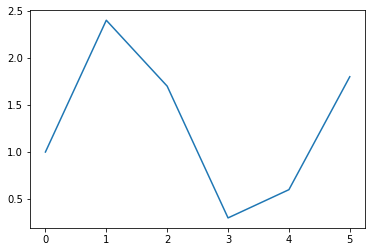

In [2]:
y = [1.0, 2.4, 1.7, 0.3, 0.6, 1.8]
plot(y)
show()

__show__ is a __blocking function__ who's default is to halt the program until the window is closed. In a Jupyter Notebook, this doesn't matter so much. You can just keep it and move on to plotting something else. However, this may become an issue if you are trying to run a self-contained piece of code.

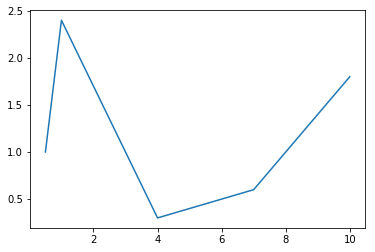

In [3]:
x = [0.5, 1.0, 2.0, 4.0, 7.0, 10.0]
y = [1.0, 2.4, 1.7, 0.3, 0.6, 1.8]
plot(x,y)
show()

__Linspace()__ generates an evenly spaced array of representing from one number to another

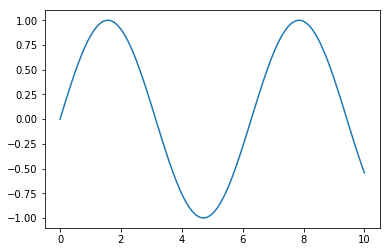

In [4]:
x = linspace(0,10,100)
y = sin(x)
plot(x,y)
show()

Remember that the computer isn't actually drawing a curve. It is simply drawing straight line segments between the points. This gives us insight into one of the basic concepts of how we solve problems numerically.

Now, let's read in some data from an external text file into an array. Note the array references. In general, its better to give each variable you want to work with a separate name.

In [5]:
# Let's see where we are
from os import getcwd
print(getcwd())

/Users/cat/testing_python


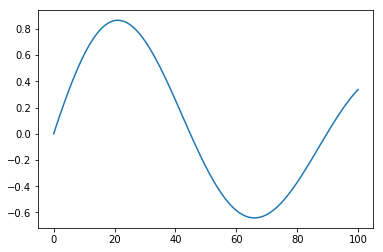

In [6]:
data = loadtxt("./cpresources/velocities.txt", float)
# data = loadtxt("./velocities.txt", float)
plot(data[:,0], data[:,1])
show()

In [7]:
# I don't get why sometimes this works - I think its a Jupyter thing
pwd

NameError: name 'pwd' is not defined

In [ ]:
# this also works sometimes
cd ..


In [ ]:
# this doesn't
cd ./testing_python

In [ ]:
# here is the recommended version
from os import chdir
chdir('/Users/cat/testing_python/')
print(getcwd())

Ok, back to the previously planned activity. Let's actively control how to display the graph.

In [ ]:
x = linspace(0,10,100)
y = sin(x)
plot(x,y)
ylim(-1.1,1.1)
xlabel("x-axis")
ylabel("y-axis")
show()

Here is a much more complex plot that highlights the line drawing options in the plot command and also how to show multiple curves on a plot
The line sytle specification starts with a lower case letter r, g, b, c, m, y, k (black), and w to specify the color then "-" for solid line "--" for dashed line" "o" for circle with no line, and "s" for square with no line or "." for a dot for scatter plots. Details in the pylab ducumentation at matplotlib.org.

In [ ]:
x = linspace(0,10,100)
y1 = sin(x)
y2 = cos(x)
plot(x,y1, "k-")
plot(x,y2, "k--")
ylim(-1.1,1.1)
xlabel("x-axis")
ylabel("Sine (solid) and Cosine (dashed) Functions")
show()

# 3.2 Scatter Plots

For scatter plots, we can use the __plot__ function and use dots or the __pylab__ package __scatter__ function.

# 3.3 Density Plots

Use __imshow__ in __pylab__. __Pylab__ also has color maps such as __gray__. See page p.106 in the textbook for other options, including defining your own. It's possible to include a color bar with __colorbar()__.

### Example 3.1 Wave Interference

Besides the physial situation two key choices: simulating a 1.) 1m square area using 500 x 500 points.

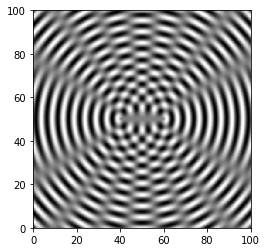

In [8]:
# import what we'll need
from math import sqrt, sin, pi
from numpy import empty
from pylab import imshow, gray, show

# define and assign values to the constants and initial conditions
# the unit for distances is cm
wavelength = 5.0
k=2*pi/wavelength
xi0 = 1.0
separation = 20.0
side = 100.0
points = 500
spacing = side/points

# calculate the initial positions of the centers of the circles
x1 = side/2 + separation/2
y1 = side/2
x2 = side/2 - separation/2
y2 = side/2

# make and arrya to store the heights
xi = empty([points,points], float)

# calculate the values in the array
for i in range(points):
    y = spacing*i
    for j in range (points):
        x = spacing*j
        r1 = sqrt((x-x1)**2 + (y-y1)**2)
        r2 = sqrt((x-x2)**2+(y-y2)**2)
        xi[i,j] = xi0*sin(k*r1) + xi0*sin(k*r2)
        
# make the plot
imshow(xi,origin="lower", extent=[0,side,0,side])
gray()
show()


# 3.4 3D Graphics 

The textbook referes to the __"visual"__ package which is now called __"vpython"__. It uses Java, and at the moment only works within Jupyter Notebooks, not Jupiter Lab. Note that there are other changes in the vpython packages since the textbook was written. Use your internet search skills to get through the barriers. Unfortunately its our reality that things change very fast.

Here are some fundamental changes I've picked up on already:

 - the __pos__argument for various objects needs to be a __vpython__ vector
 - create a __vpython__ vector using __vector(x,y,z)__
 - __display__ is now __canvass__
 
Here is the relvant paragraph from the documentation:

> Many programs written in Classic VPython 6 will run in GlowScript VPython or VPython 7 without change after being run through a conversion program written in Python. This program converts (x,y,z) => vector(x,y,z) and obj.x => obj.pos.x. These changes are necessary because GlowScript does not recognize (x,y,z) as a vector nor obj.x as a shorthand for obj.pos.x. The program also converts display => canvas and gdisplay => graph. The program also converts scene.mouse.getclick() => scene.waitfor('click'), which works in both environments.
In GlowScript VPython and VPython 7 you can use the shorthand "vec" for "vector". If you wish to use a GlowScript program containing "vec" in the Classic VPython environment, just add the statement "vec = vector" at the start of the program.
    
Current recommendation is to explicitly create a scene using canvass at the very beginning which makes it easier to handle vpython within Jupyter Notebooks.

### Example 3.2: Picturing an Atomic Lattice

In [9]:
from vpython import sphere, vector, canvas, display, color

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
scene = canvas(title='3D scene')

<IPython.core.display.Javascript object>

In [11]:
L = 5
R = 0.3
for i in range(-L, L+1):
    for j in range(-L, L+1):
        for k in range (-L, L+1):
            sphere(pos=vector(i,j,k), radius=R)

In [12]:
# scene objects have a function for deleteing themselves
scene.delete()

In [15]:
scene = canvas(background=color.blue)

<IPython.core.display.Javascript object>

In [16]:
sphere()

In [17]:
scene.delete()

# 3.5 Animation

The key to making animations work is setting the __rate()__ at which calculations are done. Otherwise, play with the canvass defaults to control how each incremental change is reflected on screen.